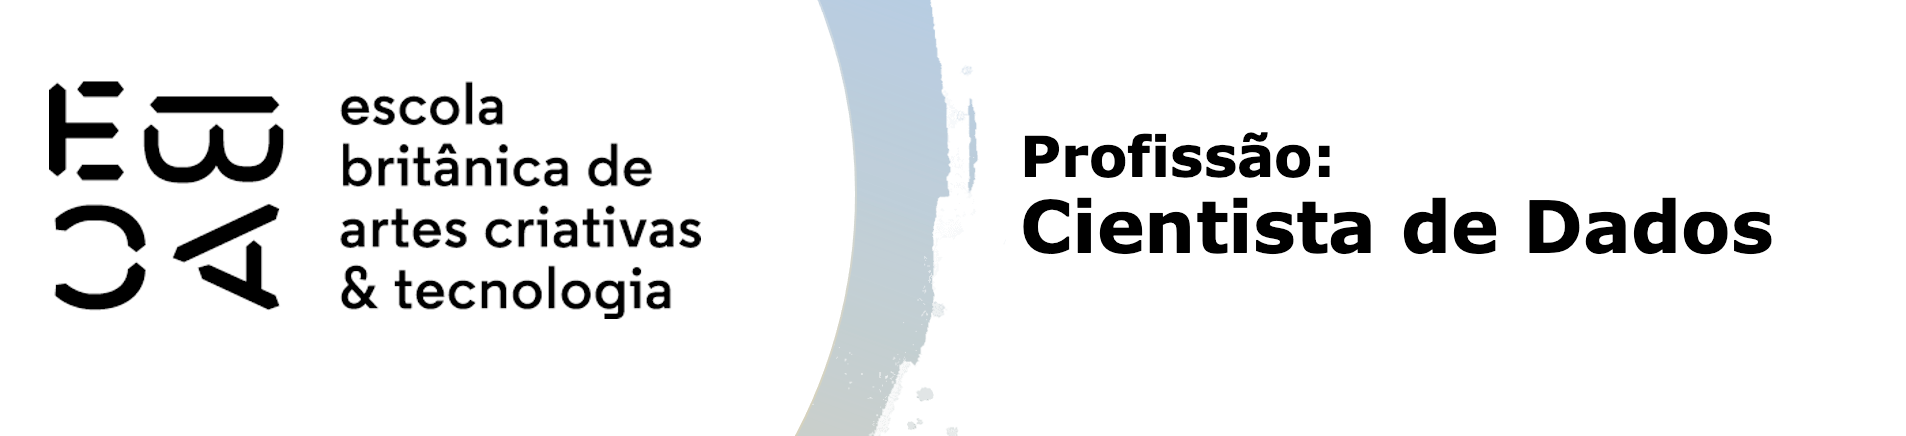

# Tarefa

Carregue a base ```NFP.ftr```. Essa base é proveniente do projeto #AMABiliDados, e contém dados da nota fiscal paulista cadastrados para doação automática para a AMA, Associação de Amigos do Autista. 

A *Nota Fiscal Paulista* é um programa de incentivo do governo do estado de São Paulo, que retorna um pedacinho do ICMS ao consumidor sempre que solicita o registro do seu CPF na nota. Nesse programa, o contribuinte pode direcionar seus créditos a uma ONG, e quando faz isso, sempre que faz esse consumidor cadastrado faz uma compra, os créditos de notas emitidas pelo mesmo estabelecimento não identificadas (notas sem CPF) são "arrastados" para a ONG na forma de uma doação.

Clique no link, caso queira saber mais sobre a [AMA](https://www.ama.org.br/site/).<br>
Clique no link, caso queira saber como o cidadão pode ser um [doador da NFP](https://doacao1.ama.org.br/sitenfp).

Essa base possui dados das notas cujos contribuintes direcionaram seus créditos à AMA. Seus campos estão descritos abaixo:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_pickle('base_nfp.pkl')
df.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes


## Análise da probabilidade de retorno

Considere somente os dados de janeiro de 2020 em diante para esta análise.

- Analise a proporção de notas que tiveram retorno>0 por categoria de estabelecimento. Esta análise pode ser por tabela ou gráfico.

      categoria  flag_retorno
0  Restaurantes      0.746214
1     Alimentos      0.681584
2       Mercado      0.478155
3    Construção      0.468810
4  não definido      0.363394
5      Farmácia      0.351556
6    Auto posto      0.250000
7     Vestuário      0.230729
8        Varejo      0.138373


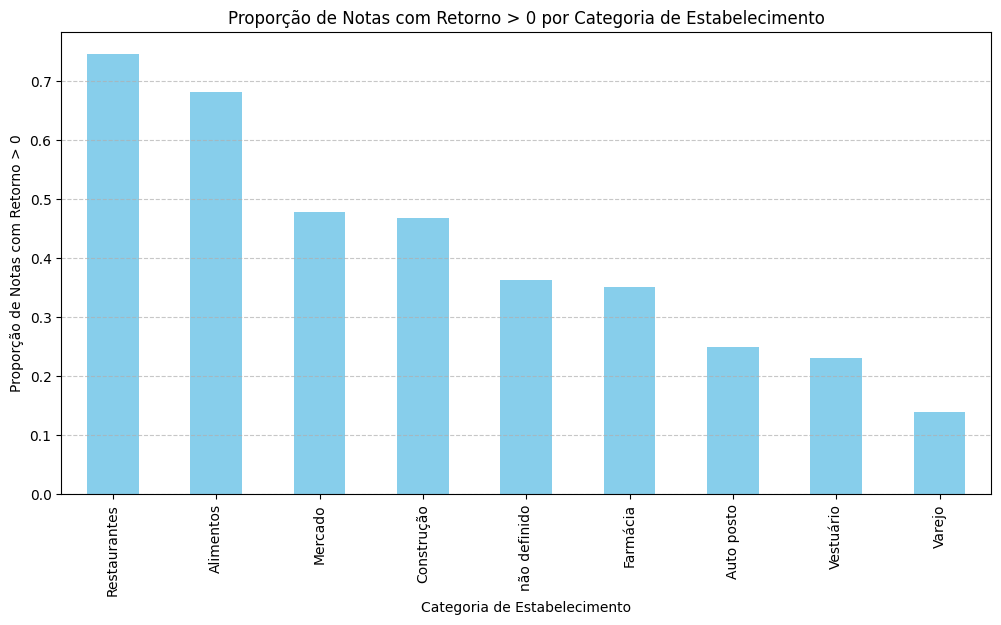

In [25]:
# Converter a coluna 'Data Emissão' para datetime
df['Data Emissão'] = pd.to_datetime(df['Data Emissão'])

# Filtrar os dados a partir de janeiro de 2020
df_filtered = df.loc[df['Data Emissão'] >= '2020-01-01'].copy()

# Criar uma coluna para indicar se teve retorno
df_filtered['flag_retorno'] = df_filtered['Retorno'] > 0

# Calcular a proporção de notas com retorno > 0 por categoria de estabelecimento
proporcao_retorno = df_filtered.groupby('categoria')['flag_retorno'].mean().sort_values(ascending=False)

# Exibir a tabela
print(proporcao_retorno.reset_index())

# Criar o gráfico
plt.figure(figsize=(12, 6))
proporcao_retorno.plot(kind='bar', color='skyblue')
plt.xlabel('Categoria de Estabelecimento')
plt.ylabel('Proporção de Notas com Retorno > 0')
plt.title('Proporção de Notas com Retorno > 0 por Categoria de Estabelecimento')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Cálculo do WOE

- Calcule o WOE das categorias, sendo que o evento em questão é a nota ter retorno>0.
- Analise este WOE por tabela e por gráfico.

      categoria       WOE  Pct_Eventos  Pct_Nao_Eventos
0     Alimentos  1.046342     0.092234         0.032395
1    Auto posto -0.813331     0.003618         0.008159
2    Construção  0.160360     0.201592         0.171723
3      Farmácia -0.326928     0.095986         0.133104
4       Mercado  0.197846     0.353100         0.289718
5  Restaurantes  1.363801     0.043571         0.011141
6        Varejo -1.543585     0.018785         0.087937
7     Vestuário -0.918918     0.011871         0.029755
8  não definido -0.275381     0.179243         0.236069


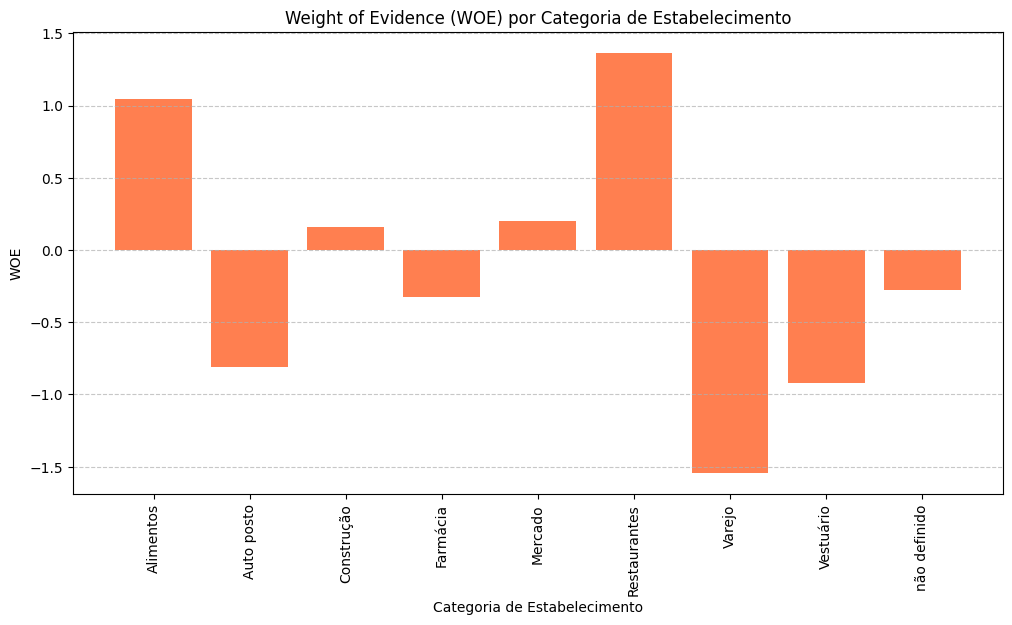

In [29]:
# Cálculo do WOE (Weight of Evidence)
def calculate_woe(df, feature, target):
    df_woe = df.groupby(feature)[target].agg(['sum', 'count']).reset_index()
    df_woe.columns = [feature, 'Eventos', 'Total']
    df_woe['Não Eventos'] = df_woe['Total'] - df_woe['Eventos']
    
    # Evitar log(0) adicionando uma pequena constante
    df_woe['Eventos'] = df_woe['Eventos'].replace(0, 0.5)
    df_woe['Não Eventos'] = df_woe['Não Eventos'].replace(0, 0.5)
    
    # Calcular proporções
    df_woe['Pct_Eventos'] = df_woe['Eventos'] / df_woe['Eventos'].sum()
    df_woe['Pct_Nao_Eventos'] = df_woe['Não Eventos'] / df_woe['Não Eventos'].sum()
    
    # Calcular WOE
    df_woe['WOE'] = np.log(df_woe['Pct_Eventos'] / df_woe['Pct_Nao_Eventos'])
    
    return df_woe[[feature, 'WOE', 'Pct_Eventos', 'Pct_Nao_Eventos']]

# Calcular WOE por categoria
df_woe = calculate_woe(df_filtered, 'categoria', 'flag_retorno')

# Exibir tabela WOE
print(df_woe)

# Criar gráfico do WOE
plt.figure(figsize=(12, 6))
plt.bar(df_woe['categoria'], df_woe['WOE'], color='coral')
plt.xlabel('Categoria de Estabelecimento')
plt.ylabel('WOE')
plt.title('Weight of Evidence (WOE) por Categoria de Estabelecimento')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Cálculo do *Information Value*

Calcule o *IV* dessa variável.

In [31]:
# Cálculo do Information Value (IV)
def calculate_iv(df_woe):
    if 'Pct_Eventos' not in df_woe.columns or 'Pct_Nao_Eventos' not in df_woe.columns:
        raise ValueError("As colunas 'Pct_Eventos' e 'Pct_Nao_Eventos' não foram geradas corretamente.")
    df_woe['IV'] = (df_woe['Pct_Eventos'] - df_woe['Pct_Nao_Eventos']) * df_woe['WOE']
    iv_value = df_woe['IV'].sum()
    return iv_value

# Calcular IV para a variável 'categoria'
iv_categoria = calculate_iv(df_woe)
print(f"Information Value (IV) para 'categoria': {iv_categoria:.4f}")

Information Value (IV) para 'categoria': 0.2788


## Conclua

Não se esqueça de registrar suas conclusões em uma célula de texto. <font color='red'>**Sugestão:**</font> tente alterar a cor da fonte nesta célula para diferenciá-la das demais.


## <span style="color:darkblue;"> Conclusões da Análise</span>

### <span style="color:purple;"> Proporção de Notas com Retorno > 0 por Categoria</span>

A análise revelou que as categorias **Restaurantes (74,62%)** e **Alimentos (68,16%)** possuem as maiores proporções de notas fiscais que geram retorno. Isso sugere que esses estabelecimentos tendem a vender produtos mais incentivados pelo programa da Nota Fiscal Paulista. Por outro lado, **Varejo (13,84%)** e **Vestuário (23,07%)** apresentam as menores proporções, indicando que suas notas fiscais têm menos probabilidade de gerar créditos.

### <span style="color:purple;"> Weight of Evidence (WOE)</span>

Os valores de WOE nos ajudam a entender a discriminação entre notas que geram retorno e aquelas que não geram. Algumas observações importantes:

- **Restaurantes (WOE = 1.36) e Alimentos (WOE = 1.04)** têm os maiores WOE positivos, indicando que essas categorias estão altamente associadas a notas que geram retorno.
- **Varejo (WOE = -1.54) e Vestuário (WOE = -0.91)** apresentam os menores WOE, sugerindo que estão mais associadas a notas que **não** geram retorno.
- **Farmácia (WOE = -0.32) e Construção (WOE = 0.16)** apresentam valores de WOE mais próximos de zero, indicando uma menor influência sobre a distinção entre notas com e sem retorno.

### <span style="color:purple;"> Information Value (IV)</span>

O **Information Value (IV) da variável "categoria" foi 0.2788**, o que indica que essa variável possui um **poder preditivo moderado**. Na prática, isso significa que a categoria do estabelecimento influencia a chance de uma nota gerar retorno, mas existem outros fatores que também desempenham um papel significativo.